 # **Portuguese Wine Quality Analysis**

This project aims to predict the quality of wine based on various physicochemical properties. It involves building a regression model that can assess wine quality using input features such as acidity, sugar content, pH level, and alcohol percentage. 

In [1]:
# Import the required modules and necessary libraries
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

Load the dataset from UCI Machine Learning Repository

In [2]:
# Read in the red wine excel files
redwine_df = pd.read_excel("../Resources/winequality-red.xlsx")

# Review the DataFrame
display(redwine_df.head())
display(redwine_df.tail())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                   32                    44  0.99490  3.45       0.58   
1595                   39                    51  0.99512  3.52       0.76   
1596                   29                    40  0.99574  3.42       0.75   
1597                   32                    44  0.99547  3.57       0.71   
1598                   18                    42  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [3]:
# Clean data - remove nulls/NANs
redwine_df.dropna(how = 'all')
display(redwine_df.tail())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                   32                    44  0.99490  3.45       0.58   
1595                   39                    51  0.99512  3.52       0.76   
1596                   29                    40  0.99574  3.42       0.75   
1597                   32                    44  0.99547  3.57       0.71   
1598                   18                    42  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [4]:
# Read in the white wine excel files
whitewine_df = pd.read_excel("../Resources/winequality_white.xlsx")

# Review the DataFrame
display(whitewine_df.head())
display(whitewine_df.tail())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [5]:
# Clean data - remove nulls/NANs
whitewine_df.dropna(how = 'all')
display(whitewine_df.tail())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

# Exploratory Data Analysis (EDA)


Visualize the data to understand distributions and correlations

In [6]:
# Use .describe to review the data
redwine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.875547             46.468418     0.996747   
std       0.047065            10.460434             32.895920     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
# Use .describe to review the data
whitewine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


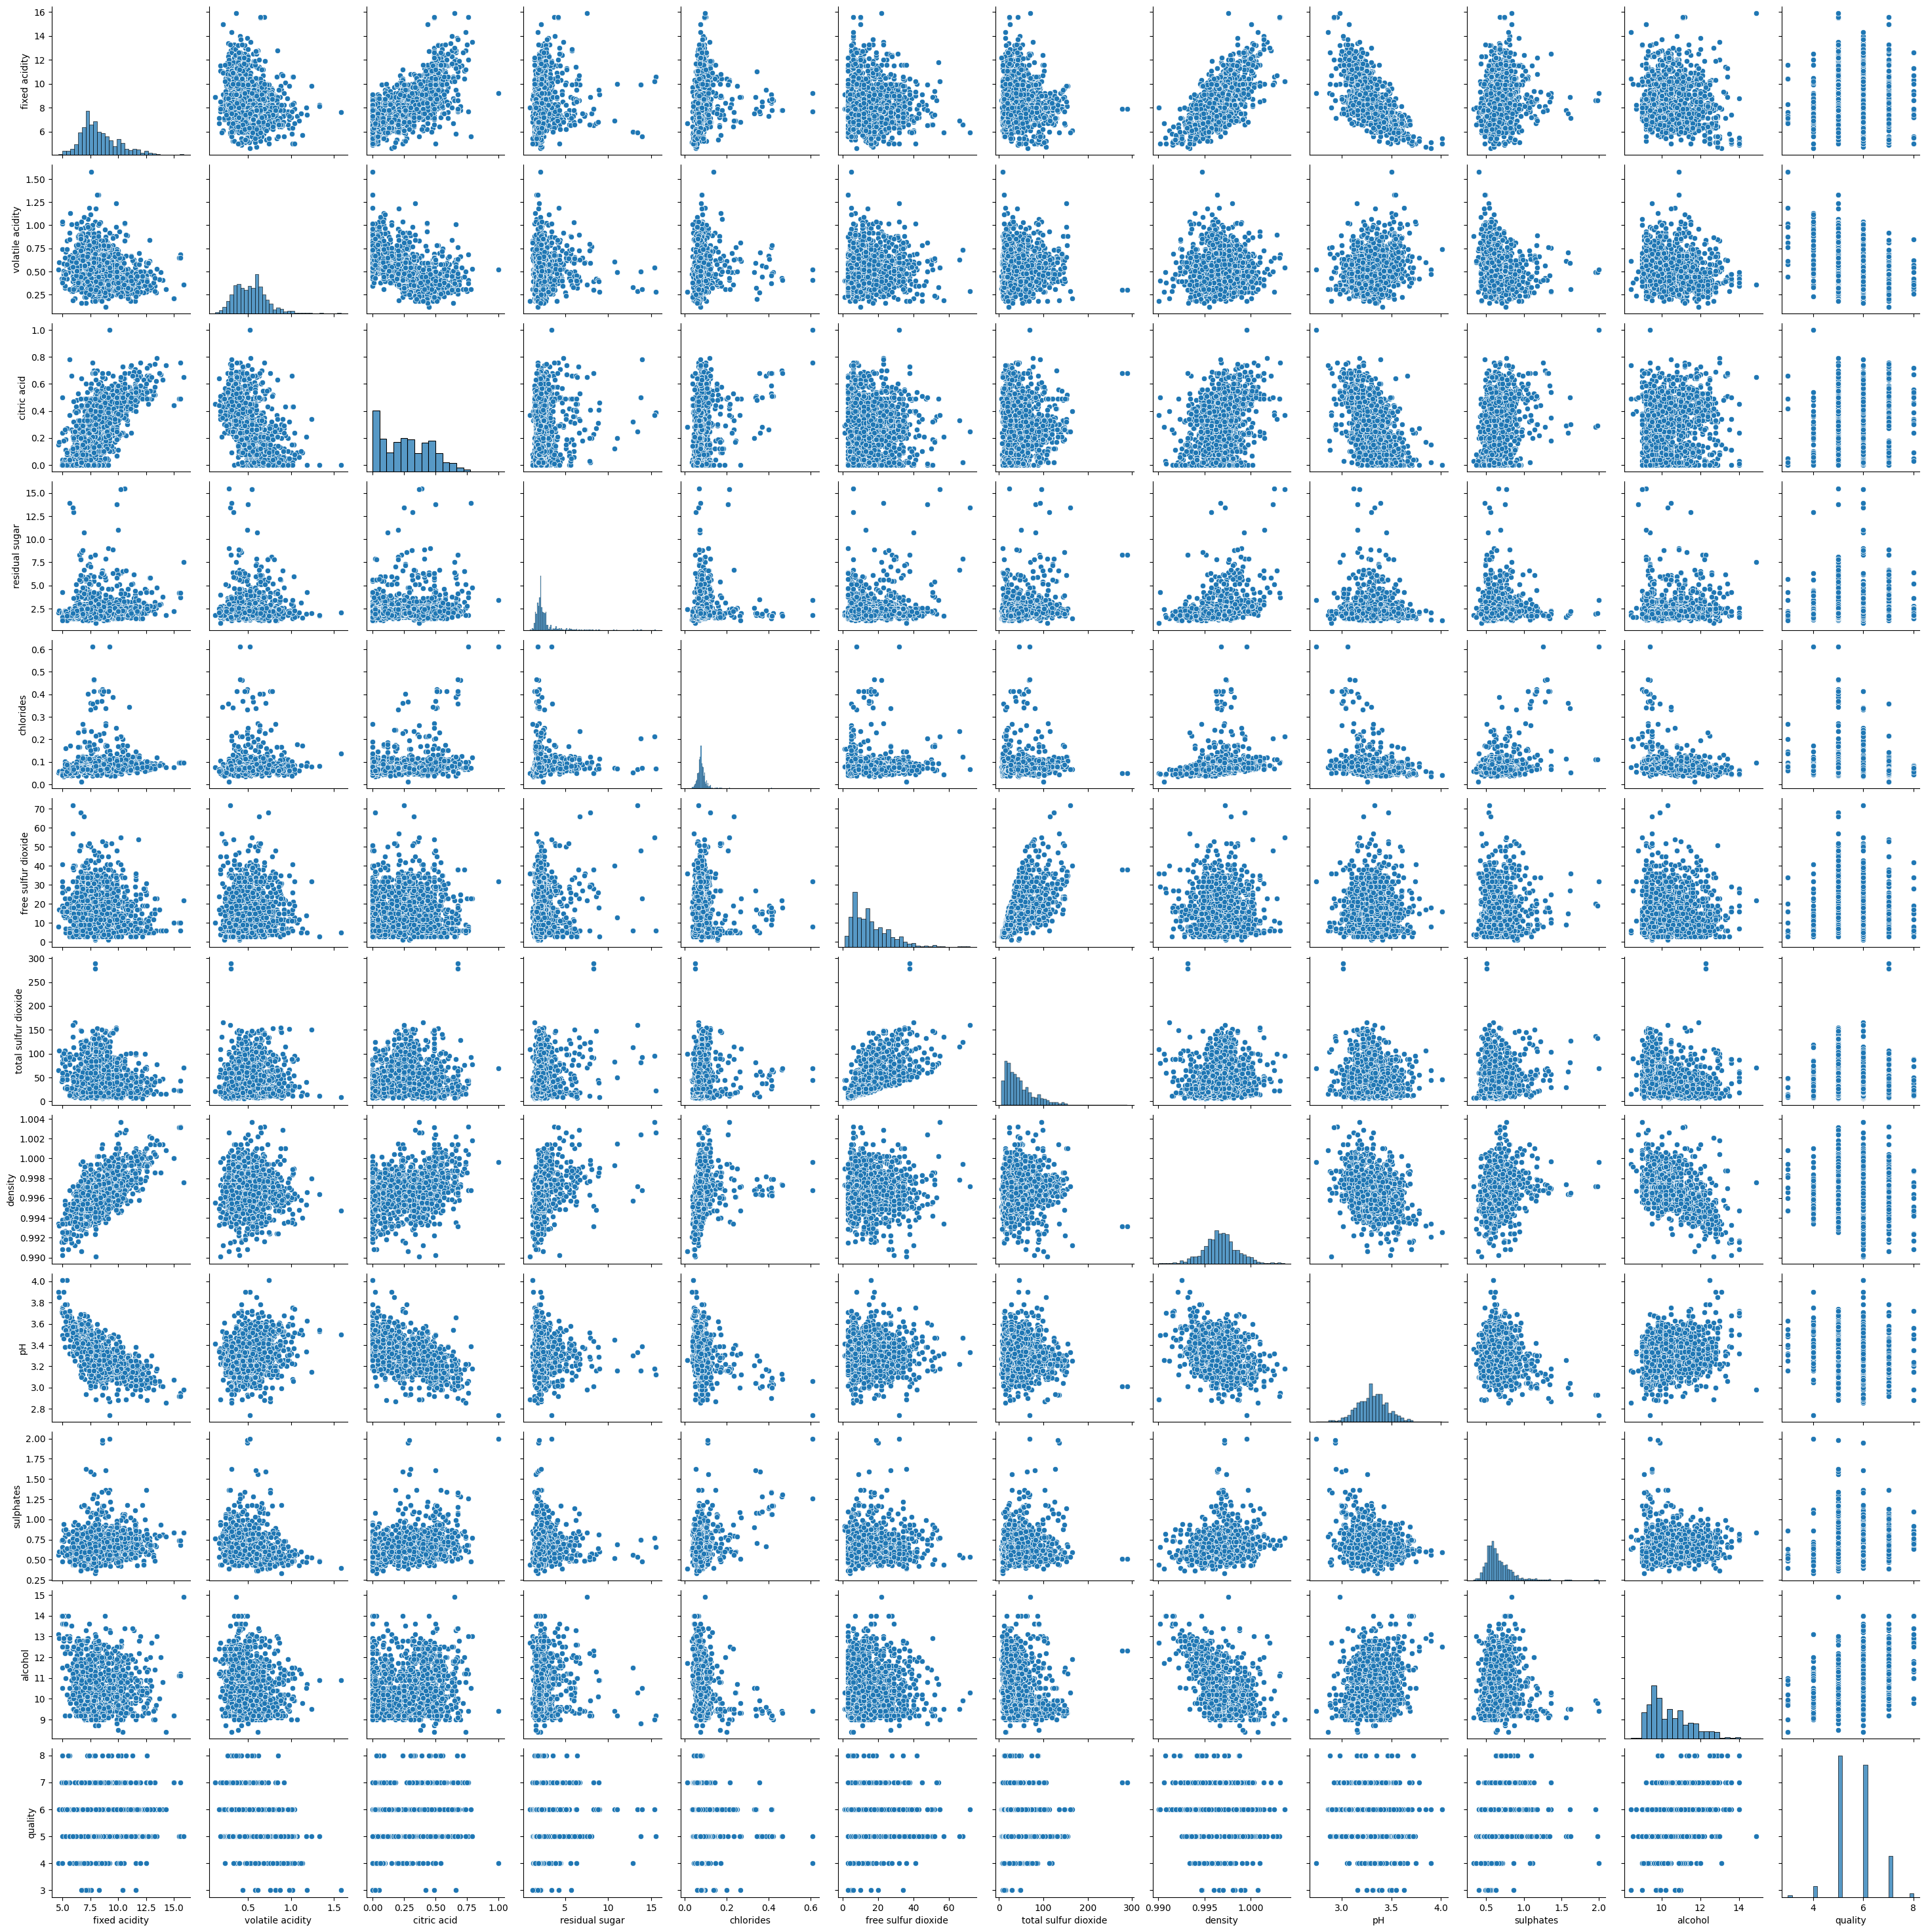

In [8]:
# Visualize the red wine dataframe with a graphical matrix
sns.pairplot(redwine_df)

C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


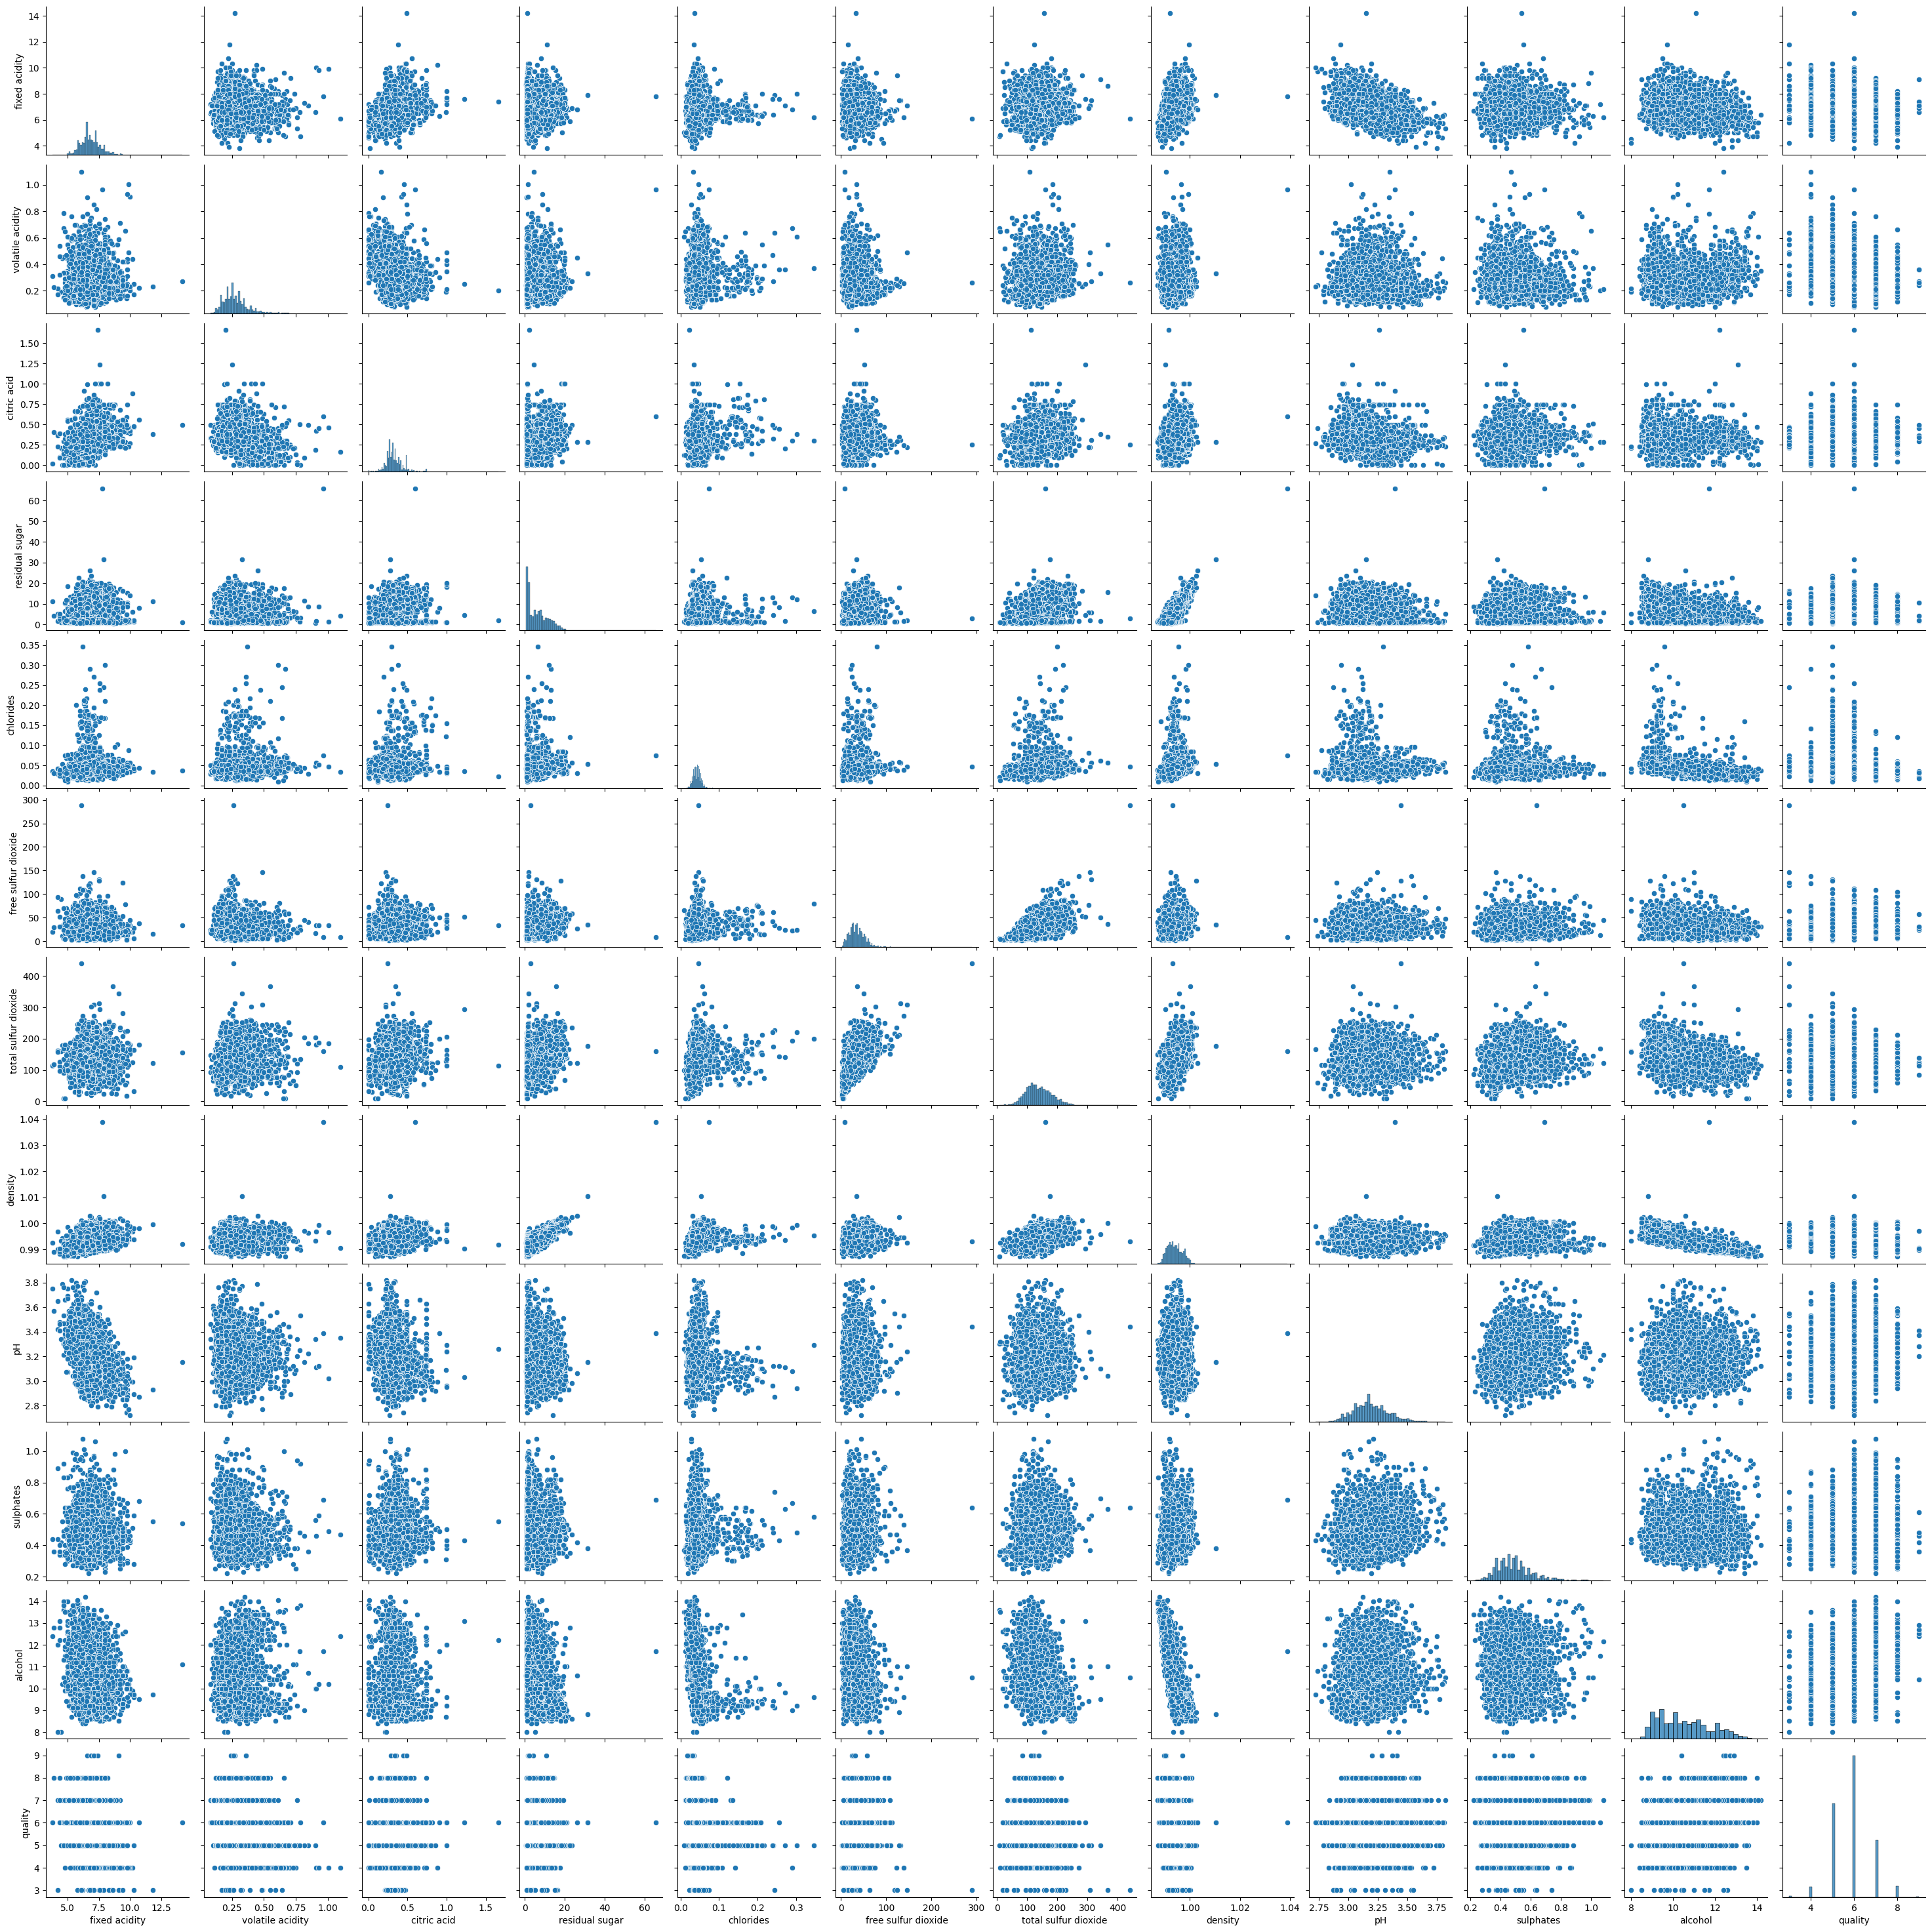

In [9]:
# Visualize the white wine dataframe with a graphical matrix
sns.pairplot(whitewine_df)

Read the above graphs as the colums are the x axis and the rows are the y axis. You can review the individual correlation between column and row; for example the correlation between the sulphates and citric acid within each graphical matrix.

At this point in the analysis the insights we gained are how the quality relates to each component of the graphical matrix.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

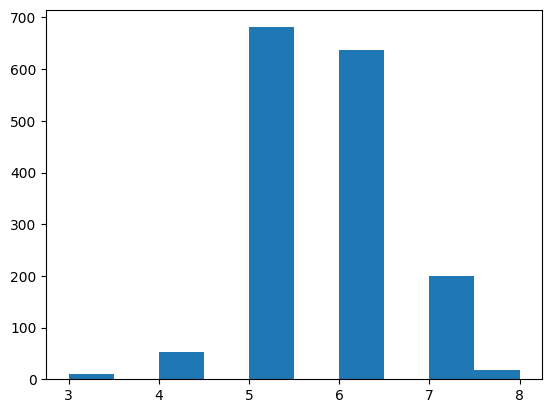

In [10]:
# Plot the quality rating of the red wine data
plt.hist(redwine_df['quality'])

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

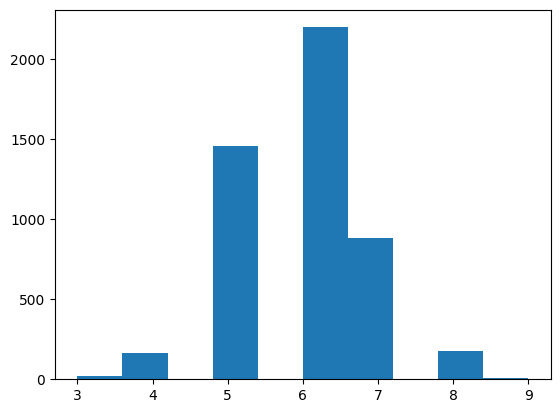

In [11]:
# Plot the quality rating of the white wine data
plt.hist(whitewine_df['quality'])

Plotting the quality rating of each wine gave us some insight into how the quality ratings were distributed for each dataset. We found that for both red and white wines there was nothing rated below a quality rating of 3. For the red wine there wasn't a quality rating above 8 and for the white wine there wasn't a quality rating above a 9. This also indicated overall that both wines' quality ratings mostly in the medium quality range (as defined below). There is a higher number of high quality wines in the white dataset, but the high quality wines were much fewer overall.

We defined our quailty bands as follows:
8-10 = High quality,
4-7 = Medium quality,
1-3 = Low quality,

# Standardizing the Data - Red Wine

In [12]:
# Defining the X and y variables
X_red = redwine_df.copy()
X_red.drop("quality", axis = 1, inplace = True)

y_red = redwine_df['quality'].ravel()
y_red[:5]

array([5, 5, 5, 6, 5], dtype=int64)

In [13]:
# Split into train and test sets
Xred_train, Xred_test, yred_train, yred_test = train_test_split(X_red, y_red, random_state = 42)

In [14]:
# Create the Standard Scaler
red_scaler = StandardScaler()

# Fit the Standard Scaler
Xred_scaler = red_scaler.fit(Xred_train)

In [15]:
# Scale the data
Xred_train_scaled = Xred_scaler.transform(Xred_train)
Xred_test_scaled = Xred_scaler.transform(Xred_test)

# Model Selection - Red Wine

Linear Regression

In [16]:
# Create Linear Regression
red_lr = LinearRegression()

In [17]:
# Fit the data into the model
red_lr.fit(X_red, y_red)

LinearRegression()

In [18]:
# Make predictions using the X set
pred_y_red_values = red_lr.predict(X_red)

In [19]:
# Create a copy of the original data
redwine_df_pred = redwine_df.copy()

# Add a column with the predicted salary values
redwine_df_pred['quality_predicted'] = pred_y_red_values

# Display sample data
redwine_df_pred.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  quality_predicted  
0      9.4        5           5.032800  
1      9.8        5           5.138028  
2      9.8        5           5.209870  
3      9.8        6           5.693817  
4      9.4        5           5.032800

In [20]:
# Compute the metrics for the linear regression model
score = red_lr.score(X_red, y_red, sample_weight = None)
r2 = r2_score(y_red, pred_y_red_values)
mse = mean_squared_error(y_red, pred_y_red_values)
rmse = np.sqrt(mse)
std = np.std(y_red)

# Print relevant metrics
print(f"The red wine score is {score}.")
print(f"The red wine r2 is {r2}.")
print(f"The red wine mean squared error is {mse}.")
print(f"The red wine root mean squared error is {rmse}.")
print(f"The red wine standard deviation is {std}.")

The red wine score is 0.36056778057136796.
The red wine r2 is 0.36056778057136796.
The red wine mean squared error is 0.41675668852002945.
The red wine root mean squared error is 0.6455669512297152.
The red wine standard deviation is 0.8073168769639513.


Random Forest

In [21]:
# Create a Random Forest Classifier
red_rfmodel = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [22]:
# Fit the model
red_rfmodel = red_rfmodel.fit(Xred_train_scaled, yred_train)

In [23]:
# Making predictions using the testing data
red_predict = red_rfmodel.predict(Xred_test_scaled)

In [24]:
# Red Wine Model Evaluations
# Calculating the confusion matrix
red_cm = confusion_matrix(yred_test,red_predict)


red_cm_df = pd.DataFrame(red_cm, index = ["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5"], columns = ["Predicted 0", "Predicted 1", "Predict 2", "Predict 3", "Predict 4", "Predict 5"])
red_cm_df.head()

Predicted 0  Predicted 1  Predict 2  Predict 3  Predict 4  Predict 5
Actual 0            0            0          1          0          0          0
Actual 1            0            0          7          6          0          0
Actual 2            0            0        123         40          1          0
Actual 3            0            0         38        121         10          0
Actual 4            0            0          0         24         23          1

In [25]:
# Calculating the Accuracy Score
red_acc_score = accuracy_score(yred_test, red_predict)

In [26]:
# Display Results
print('Red Confustion Matrix')
display(red_cm_df)
print(f'Accuracy Score: {red_acc_score}')
print('Classification Report')
print(classification_report(yred_test, red_predict))

Red Confustion Matrix


Predicted 0  Predicted 1  Predict 2  Predict 3  Predict 4  Predict 5
Actual 0            0            0          1          0          0          0
Actual 1            0            0          7          6          0          0
Actual 2            0            0        123         40          1          0
Actual 3            0            0         38        121         10          0
Actual 4            0            0          0         24         23          1
Actual 5            0            0          0          0          5          0

Accuracy Score: 0.6675
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.73      0.75      0.74       164
           6       0.63      0.72      0.67       169
           7       0.59      0.48      0.53        48
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.33      0.32      0.32       400
weighted avg       0.64      0.67      0.65       400



C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

Feature Importance - Random Forest

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
red_importances = red_rfmodel.feature_importances_

# We can sort the features by their importance
sorted(zip(red_rfmodel.feature_importances_, X_red.columns), reverse=True)

[(0.15210021326777842, 'alcohol'),
 (0.11142856347875589, 'sulphates'),
 (0.10550233518688334, 'total sulfur dioxide'),
 (0.10044381697017724, 'volatile acidity'),
 (0.09125050183457746, 'density'),
 (0.08119328955978676, 'chlorides'),
 (0.07423419919703053, 'pH'),
 (0.07419715428136407, 'fixed acidity'),
 (0.0723709098757716, 'citric acid'),
 (0.07215603183947104, 'residual sugar'),
 (0.06512298450840374, 'free sulfur dioxide')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

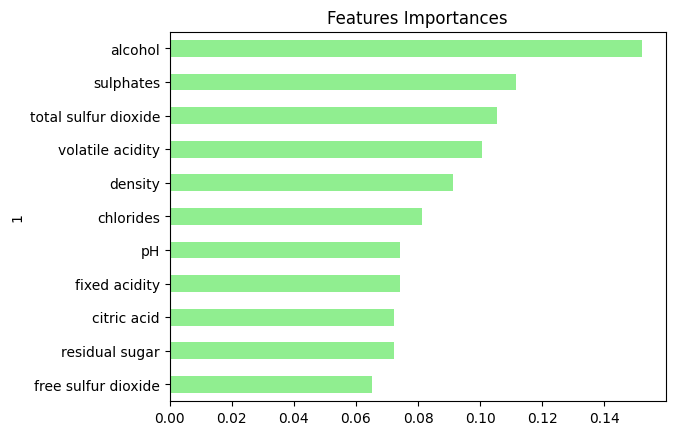

In [28]:
# Visualize the features by importance
red_importances_df = pd.DataFrame(sorted(zip(red_rfmodel.feature_importances_, X_red.columns), reverse=True))
red_importances_df.set_index(red_importances_df[1], inplace=True)
red_importances_df.drop(columns=1, inplace=True)
red_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
red_importances_sorted = red_importances_df.sort_values(by='Feature Importances')
red_importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Gradiant Boosting

In [29]:
# Gradiant Boosting
X_red, y_red = make_classification(n_samples = 1000, n_features = 20, random_state = 42)

In [30]:
# Splitting the data into train and test sets
Xred_train, Xred_test, yred_train, yred_test = train_test_split(X_red, y_red, test_size = 0.2, random_state = 42)

In [31]:
# Create a Gradient Boosting Classifier
red_gb_classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)

In [32]:
# Fitting the model
red_gb_classifier.fit(Xred_train, yred_train)

GradientBoostingClassifier(random_state=42)

In [33]:
# Making predictions
red_predictions = red_gb_classifier.predict(Xred_test)

In [34]:
# Calculating accuracy
red_accuracy = accuracy_score(yred_test, red_predictions)
print(f"Accuracy of the Gradient Boosting Classifier: {red_accuracy:.2f}")

Accuracy of the Gradient Boosting Classifier: 0.91


After trying 3 models - Linear Regression, Random Forest, and Gradient Boosting - we found that the most successful model ended up being Gradient Boosting, with an accuracy score of 91%. Random Forest, which we had initially identified as being the best model for this data, ended up having the low accuracy score of 67%. The worst model for the data ended up being the Linear Regression model with values that would indicate the model is a failure. 

# Standardizing the Data - White Wine

In [35]:
# Defining the X and y variables
X_white = whitewine_df.copy()
X_white.drop("quality", axis = 1, inplace = True)

y_white = whitewine_df['quality'].ravel()
y_white[:5]

array([6, 6, 6, 6, 6], dtype=int64)

In [36]:
#Split into train and test sets
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(X_white, y_white, random_state = 42)

In [37]:
#Create the Standard Scaler
white_scaler = StandardScaler()

#Fitting Standard Scaler
Xwhite_scaler = white_scaler.fit(Xwhite_train)

In [38]:
#Scaling data
Xwhite_train_scaled = Xwhite_scaler.transform(Xwhite_train)
Xwhite_test_scaled = Xwhite_scaler.transform(Xwhite_test)

# Model Selection - White Wine

Linear Regression

In [39]:
#Create Linear Regression
white_lr = LinearRegression()

In [40]:
# Fit the data into the model
white_lr.fit(X_white, y_white)

LinearRegression()

In [41]:
# Make predictions using the X set
pred_y_white_values = white_lr.predict(X_white)

In [42]:
# Create a copy of the original data
whitewine_df_pred = whitewine_df.copy()

# Add a column with the predicted salary values
whitewine_df_pred['quality_predicted'] = pred_y_white_values

# Display sample data
whitewine_df_pred.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_predicted  
0      8.8        6           5.562658  
1      9.5        6           5.216873  
2     10.1        6           5.766480  
3      9.9        6           5.778183  
4      9.9        6           5.778183

In [43]:
# Compute the metrics for the linear regression model
score = white_lr.score(X_white, y_white, sample_weight=None)
r2 = r2_score(y_white, pred_y_white_values)
mse = mean_squared_error(y_white, pred_y_white_values)
rmse = np.sqrt(mse)
std = np.std(y_white)

# Print relevant metrics.
print(f"The white wine score is {score}.")
print(f"The white wine r2 is {r2}.")
print(f"The white wine mean squared error is {mse}.")
print(f"The white wine root mean squared error is {rmse}.")
print(f"The white wine standard deviation is {std}.")

The white wine score is 0.28187036413328526.
The white wine r2 is 0.28187036413328526.
The white wine mean squared error is 0.563154062988657.
The white wine root mean squared error is 0.7504359153109991.
The white wine standard deviation is 0.8855481621683543.


Random Forest

In [44]:
# Create a Random Forest Classifier
white_rfmodel = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [45]:
# Fit the model
white_rfmodel = white_rfmodel.fit(Xwhite_train_scaled, ywhite_train)

In [46]:
# Making predictions using the testing data
white_predict = white_rfmodel.predict(Xwhite_test_scaled)

In [47]:
# White Wine Model Evaluations
# Calculating the confusion matrix
white_cm = confusion_matrix(ywhite_test, white_predict)

white_cm_df = pd.DataFrame(white_cm, index = ["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5"], columns = ["Predicted 0", "Predicted 1", "Predict 2", "Predict 3", "Predict 4", "Predict 5"])
white_cm_df.head()

Predicted 0  Predicted 1  Predict 2  Predict 3  Predict 4  Predict 5
Actual 0            0            0          3          4          0          0
Actual 1            0            5         16         11          0          0
Actual 2            0            3        244        109          2          0
Actual 3            0            1         77        440         26          0
Actual 4            0            0          5         95        141          0

In [48]:
# Calculating the Accuracy Score
white_acc_score = accuracy_score(ywhite_test, white_predict)

In [49]:
# Display Results
print('White Wine Confustion Matrix')
display(white_cm_df)
print(f'Accuracy Score: {white_acc_score}')
print('Classification Report')
print(classification_report(ywhite_test, white_predict))

White Wine Confustion Matrix


Predicted 0  Predicted 1  Predict 2  Predict 3  Predict 4  Predict 5
Actual 0            0            0          3          4          0          0
Actual 1            0            5         16         11          0          0
Actual 2            0            3        244        109          2          0
Actual 3            0            1         77        440         26          0
Actual 4            0            0          5         95        141          0
Actual 5            0            0          1         13         14         15

Accuracy Score: 0.689795918367347
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.56      0.16      0.24        32
           5       0.71      0.68      0.69       358
           6       0.65      0.81      0.72       544
           7       0.77      0.59      0.67       241
           8       1.00      0.35      0.52        43

    accuracy                           0.69      1225
   macro avg       0.61      0.43      0.47      1225
weighted avg       0.70      0.69      0.68      1225



C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evilp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [50]:
# Random Forests in sklearn will automatically calculate feature importance
whitewine_importances = white_rfmodel.feature_importances_

# We can sort the features by their importance
sorted(zip(white_rfmodel.feature_importances_, X_white.columns), reverse=True)

[(0.11391167803529766, 'alcohol'),
 (0.10390668097239925, 'density'),
 (0.1026267234551232, 'volatile acidity'),
 (0.0937739595282129, 'free sulfur dioxide'),
 (0.09217453109127506, 'total sulfur dioxide'),
 (0.08777371405315289, 'residual sugar'),
 (0.08613696282335744, 'pH'),
 (0.08420211376261373, 'chlorides'),
 (0.08006139458101284, 'citric acid'),
 (0.07910729882423821, 'sulphates'),
 (0.0763249428733169, 'fixed acidity')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

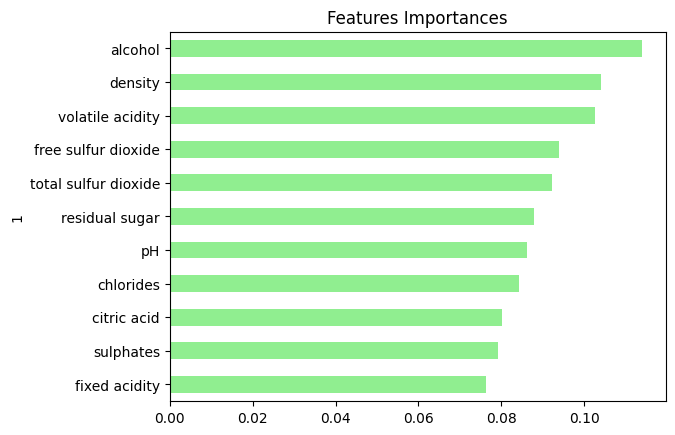

In [51]:
# Visualize the features by importance
whitewine_importances_df = pd.DataFrame(sorted(zip(white_rfmodel.feature_importances_, X_white.columns), reverse=True))
whitewine_importances_df.set_index(whitewine_importances_df[1], inplace=True)
whitewine_importances_df.drop(columns=1, inplace=True)
whitewine_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
whitewine_importances_sorted = whitewine_importances_df.sort_values(by='Feature Importances')
whitewine_importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Gradiant Boosting

In [52]:
# Gradiant Boosting
X_white, y_white = make_classification(n_samples = 1000, n_features = 20, random_state = 42)

In [53]:
# Splitting the data into train and test sets
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(X_white, y_white, test_size = 0.2, random_state = 42)

In [54]:
# Creating a Gradient Boosting Classifier
# You can adjust the hyperparameters such as n_estimators, learning_rate, max_depth, etc.
whitewine_gb_classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)

In [55]:
# Fitting the model
whitewine_gb_classifier.fit(Xwhite_train, ywhite_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Making predictions
whitewine_predictions = whitewine_gb_classifier.predict(Xwhite_test)

In [57]:
# Calculating accuracy
whitewine_accuracy = accuracy_score(ywhite_test, whitewine_predictions)
print(f"Accuracy of the Gradient Boosting Classifier: {whitewine_accuracy:.2f}")

Accuracy of the Gradient Boosting Classifier: 0.91


With the white wine dataset we used the same 3 models as we did with the red wine data set - Linear Regression, Random Forest, and Gradient Boosting - we found that the most successful model ended up being Gradient Boosting again, with an accuracy score of 91%. Random Forest ended up having the low accuracy score of 69%. The worst model for the data ended up being the Linear Regression model with values that would indicate the model is a failure, even more so than with the red wine model. 

# Fine-tuning hyperparameters

Red Wine

In [58]:
print(Xred_train_scaled.shape)
print(yred_train.shape)

(1199, 11)
(800,)


In [59]:
Xred_train, Xred_test, yred_train, yred_test = train_test_split(X_red, y_red, test_size = 0.2, random_state = 42)

In [60]:
# Fit the Standard Scaler on the training data
Xred_scaler = red_scaler.fit(Xred_train)

# Scale the training data
Xred_train_scaled = Xred_scaler.transform(Xred_train)

# Scale the testing data
Xred_test_scaled = Xred_scaler.transform(Xred_test)


In [61]:
print(Xred_train_scaled.shape)
print(yred_train.shape)

(800, 20)
(800,)


In [63]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(Xred_train_scaled, yred_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a base model
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(Xred_train, yred_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


The code above is the start of fine-tuning of the hyperparameters. This process is used to improve each model

White Wine

In [65]:
print(Xwhite_train_scaled.shape)
print(ywhite_train.shape)

(3673, 11)
(800,)


In [66]:
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(X_white, y_white, test_size = 0.2, random_state = 42)

In [67]:
# Fit the Standard Scaler on the training data
Xwhite_scaler = white_scaler.fit(Xwhite_train)

# Scale the training data
Xwhite_train_scaled = Xwhite_scaler.transform(Xwhite_train)

# Scale the testing data
Xwhite_test_scaled = Xwhite_scaler.transform(Xwhite_test)

In [68]:
print(Xwhite_train_scaled.shape)
print(ywhite_train.shape)

(800, 20)
(800,)


In [69]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring = 'accuracy')

# Fit the grid search to the data
grid_search.fit(Xwhite_train_scaled, ywhite_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a base model
gb = GradientBoostingClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, 
                           cv =  3, n_jobs = -1, verbose = 2, scoring = 'accuracy')

# Fit the grid search to the data
grid_search.fit(Xwhite_train, ywhite_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
